# 문제 3 — 함수 최소화
다음 함수를 고려한다:
\[ f(x) = x^4 - 4x \]

**문제**
1. `scipy.optimize.minimize_scalar` 를 사용하여 지역 최소값을 구하시오.
2. 뉴턴-랩슨 방법(Newton-Raphson Method)을 적용하여 최소값을 구하시오.
3. 경사하강법(Gradient Descent)을 적용하여 최소값을 구하시오.

모든 코드와 출력은 한글 주석과 함께 작성한다.


In [1]:

# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

try:
    from scipy.optimize import minimize_scalar
    SCIPY_AVAILABLE = True
except:
    SCIPY_AVAILABLE = False

# 함수 정의
def f(x):
    return x**4 - 4*x

# 1차 미분 (gradient)
def df(x):
    return 4*x**3 - 4

# 2차 미분 (Hessian)
def d2f(x):
    return 12*x**2


## 함수 시각화

/Users/skycave/repository/idas/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/skycave/repository/idas/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/skycave/repository/idas/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/skycave/repository/idas/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/skycave/repository/idas/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: Use

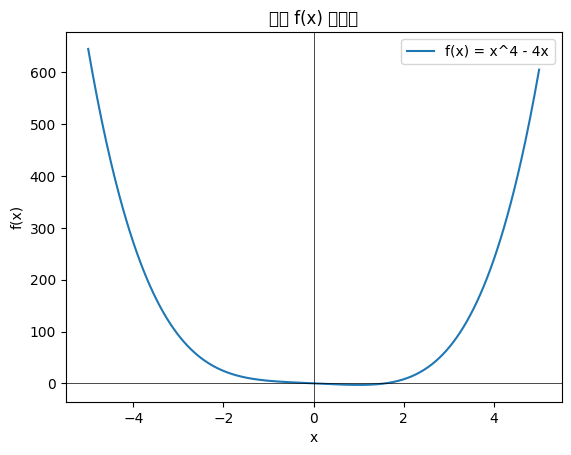

In [2]:

xs = np.linspace(-5, 5, 400)
ys = f(xs)

plt.figure()
plt.plot(xs, ys, label="f(x) = x^4 - 4x")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.title("함수 f(x) 그래프")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


## (a) SciPy 최적화

In [3]:

if SCIPY_AVAILABLE:
    res = minimize_scalar(f, bounds=(-5, 5), method="bounded")
    print("SciPy 결과:")
    print("  최소점 x* =", res.x)
    print("  최소값 f(x*) =", res.fun)
else:
    print("SciPy를 사용할 수 없어, 단순 격자 탐색으로 근사치를 구함.")
    xs_grid = np.linspace(-5, 5, 20001)
    vals = f(xs_grid)
    idx = np.argmin(vals)
    print("  근사 최소점 x* =", xs_grid[idx])
    print("  근사 최소값 f(x*) =", vals[idx])


SciPy 결과:
  최소점 x* = 1.0000007153088344
  최소값 f(x*) = -2.99999999999693


## (b) 뉴턴-랩슨 방법

In [ ]:

def newton_minimize(x0, max_iter=50, tol=1e-10):
    x = float(x0)
    history = [x]
    for i in range(max_iter):
        g = df(x)
        h = d2f(x)
        if abs(g) < tol:
            break
        if h == 0:
            break
        x_new = x - g / h
        history.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, f(x), history

초기값들 = [0.1, 0.5, 2.0, -1.0, 5.0]
for x0 in 초기값들:
    xm, fm, hist = newton_minimize(x0)
    print(f"초기값 {x0} → 최소점 x*={xm:.6f}, 최소값 f(x*)={fm:.6f}, 반복횟수={len(hist)-1}")


## (c) 경사하강법

In [ ]:

def gradient_descent(x0, lr=0.05, max_iter=2000, tol=1e-10):
    x = float(x0)
    history = [x]
    for i in range(max_iter):
        g = df(x)
        if abs(g) < tol:
            break
        x_new = x - lr * g
        history.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, f(x), history

초기값들 = [-2.0, -0.5, 0.5, 2.0, 5.0]
for x0 in 초기값들:
    xm, fm, hist = gradient_descent(x0, lr=0.01)
    print(f"초기값 {x0} → 최소점 x*={xm:.6f}, 최소값 f(x*)={fm:.6f}, 반복횟수={len(hist)-1}")


## 해석적 해답

In [ ]:

print("해석적으로 f'(x)=0 → 4x^3 - 4 = 0 → x^3 = 1 → x=1")
print("f''(1)=12 > 0 이므로 최소점임.")
print("따라서 최소점 x* = 1, 최소값 f(x*) = -3")
